In [31]:
import pandas as pd
import numpy as np

In [32]:
path='/kaggle/input/social-network-ads/Social_Network_Ads.csv'
df=pd.read_csv(path)

In [33]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [34]:
df.shape

(400, 3)

In [35]:
df.duplicated().sum()

33

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(367, 3)

In [38]:
df['Purchased'].value_counts()

Purchased
0    229
1    138
Name: count, dtype: int64

In [39]:
X = df.drop('Purchased', axis=1)

In [40]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [41]:
y = df['Purchased']

In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 367, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [44]:
X_scaled.shape

(367, 2)

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [46]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 dense_8 (Dense)             (None, 8)                 88        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 127 (508.00 Byte)
Trainable params: 127 (508.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Using Sochastic Gradient Descent

In [49]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=100,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/100
293/293 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8805 - val_loss: 0.4048 - val_accuracy: 0.9459
Epoch 2/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8805 - val_loss: 0.3335 - val_accuracy: 0.9459
Epoch 3/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2752 - accuracy: 0.8874 - val_loss: 0.3117 - val_accuracy: 0.9054
Epoch 4/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.8771 - val_loss: 0.2958 - val_accuracy: 0.9054
Epoch 5/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2766 - accuracy: 0.8771 - val_loss: 0.2728 - val_accuracy: 0.9189
Epoch 6/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2784 - accuracy: 0.8737 - val_loss: 0.2626 - val_accuracy: 0.9459
Epoch 7/100
293/293 [==============================] - 1s 2ms/step - loss: 0.2789 - accuracy: 0.8805 - val_loss: 0.2561 - val_accuracy: 0.9459

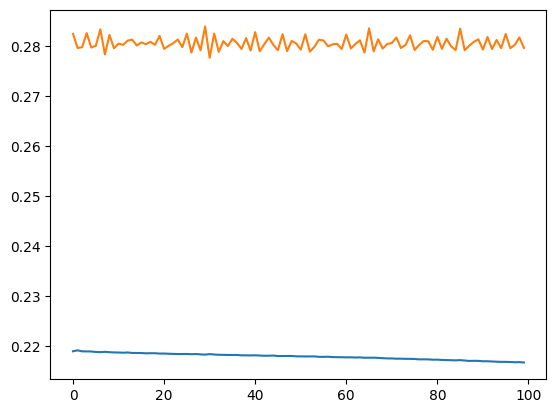

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

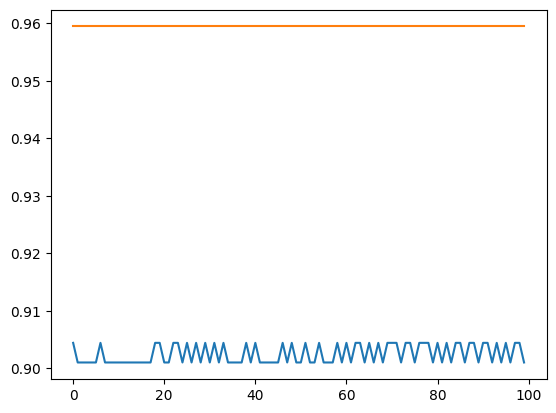

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Using Batch Gradient Descent

In [61]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=10,batch_size=367,validation_split=0.2)


Epoch 1/10
1/1 [==============================] - 1s 842ms/step - loss: 0.2163 - accuracy: 0.9044 - val_loss: 0.2838 - val_accuracy: 0.9595
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 0.2166 - accuracy: 0.9010 - val_loss: 0.2767 - val_accuracy: 0.9595
Epoch 3/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2163 - accuracy: 0.9044 - val_loss: 0.2846 - val_accuracy: 0.9595
Epoch 4/10
1/1 [==============================] - 0s 36ms/step - loss: 0.2162 - accuracy: 0.9010 - val_loss: 0.2787 - val_accuracy: 0.9595
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2163 - accuracy: 0.9044 - val_loss: 0.2853 - val_accuracy: 0.9595
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.2162 - accuracy: 0.9010 - val_loss: 0.2800 - val_accuracy: 0.9595
Epoch 7/10
1/1 [==============================] - 0s 35ms/step - loss: 0.2161 - accuracy: 0.9044 - val_loss: 0.2824 - val_accuracy: 0.9595
Epoch 8/10
1/1 [==========

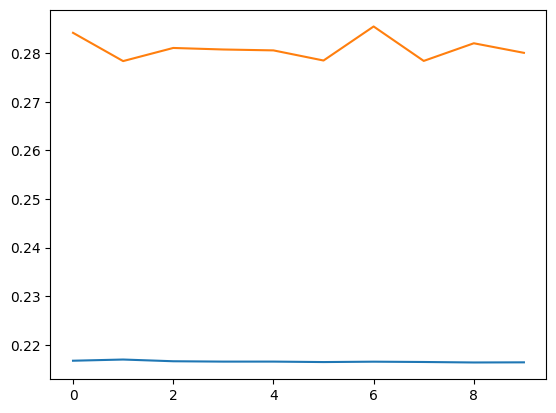

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

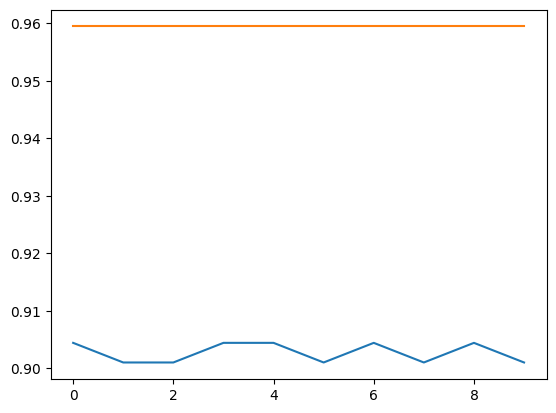

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])